<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/unit-2/notebook_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: problems related to Unit 1:

In [1]:
# Importing libraries, # can be used in python to comment code

import numpy as np # np, plt are aliases
import scipy
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
# This is to show the plots online

## **1. Problem (statistical distributions)**

Imagine a room containing fourteen people, whose ages are as follows: one person aged 14, one person aged 15, three people aged 16, two people aged 22, two people aged 24, five people aged 25.

(a) Compute $<j>^2$ and $<j^2>$.

(b) Compute the $\sqrt{<j^2> - <j>^2}$

(c) Compute the standard deviation and compare with (b).

In [3]:
sample = np.array([14,15,16,16,16,22,22,24,24,25,25,25,25,25])
print(sample)

[14 15 16 16 16 22 22 24 24 25 25 25 25 25]


(array([1., 1., 3., 0., 0., 0., 2., 0., 2., 5.]),
 array([13. , 14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. ]),
 [<matplotlib.patches.Polygon at 0x7b75c419a4a0>])

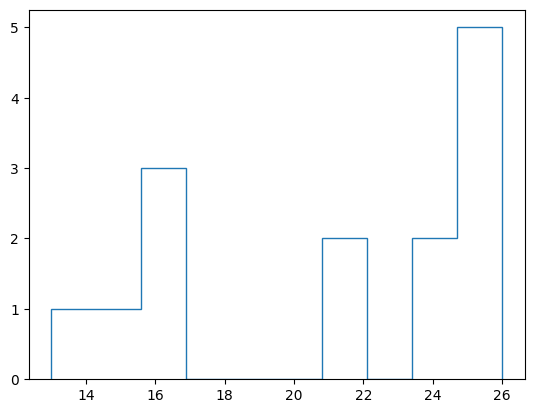

In [4]:
plt.hist(sample, bins=10, range=(13,26), histtype='step')


In [5]:
av_sample = np.mean(sample)

print("average is =", av_sample)

average is = 21.0


In [6]:
sqr_av_sample = np.mean(sample**2)

print("average is =", sqr_av_sample)

average is = 459.57142857142856


In [7]:
sigma_sample = np.sqrt(sqr_av_sample - av_sample**2)

print("sigma is =", sigma_sample)

sigma is = 4.309458036856672


In [8]:
std_sample = np.std(sample)

print("sigma is =", std_sample)

sigma is = 4.3094580368566735


## **2. Problem (Gaussian distributions):**

Consider the Gaussian distribution:

$\rho(x) = A\,e^{−\lambda\,(x−a)^2}$

where: $A = \sqrt{\frac{\lambda}{\pi}}$, $a$, $\lambda$ are positive real constants.

Sketch $\rho(x)$ versus $x$ for different values of $A$, $a$ and $\lambda$.

In [10]:
# Define function  for PDF

def rho_x(l,a,x):
  """
  Function used to represent Gaussians.
  Inputs: l -> lambda (sigma), a -> displacement, =
          A(l) -> normalisation factor (height)
          x -> vector
  Output: PDF(x)
  """
  # Normalisation factor
  A = np.sqrt(l/np.pi)
  # PDF
  rho = A*np.exp(-l*(x - a)**2)

  return rho


In [11]:
help(rho_x)

Help on function rho_x in module __main__:

rho_x(l, a, x)
    Function used to represent Gaussians.
    Inputs: l -> lambda (sigma), a -> displacement, =
            A(l) -> normalisation factor (height)
            x -> vector
    Output: PDF(x)



In [13]:
# Create a vector for x

x = np.arange(-10, 10.01, 0.01)

print(x)

print(x.shape)

[-10.    -9.99  -9.98 ...   9.98   9.99  10.  ]
(2001,)


In [17]:
# Evaluate the function once

y1 = rho_x(2,-3,x)

# Evaluate the function again for different values

y2 = rho_x(0.5,5,x)

# Evaluate the function again for different values

y3 = rho_x(1.2,0.,x)

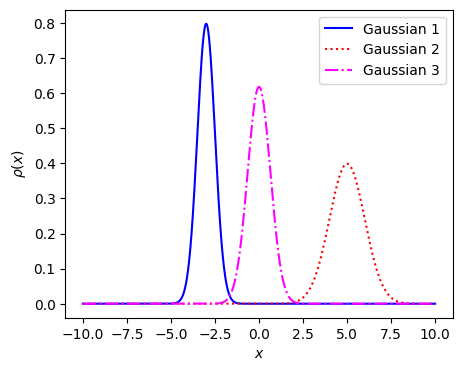

In [19]:
# Fig environment
plt.figure(figsize=(5,4))

plt.plot(x, y1, label = "Gaussian 1", color ="blue", linestyle = "-")
plt.plot(x, y2, label = "Gaussian 2", color ="red", linestyle =":")
plt.plot(x, y3, label = "Gaussian 3", color ="magenta", linestyle ="-.")

plt.xlabel(r"$x$")
plt.ylabel(r"$\rho(x)$")

plt.legend()
plt.show()
#plt.savefig("gaussians.png")

## **3. Problem:** Sketch $\Psi(x)$ at t=0:

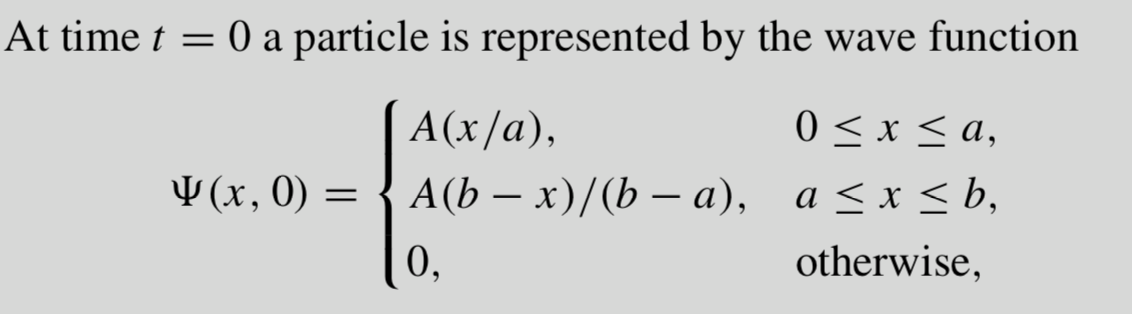

In [20]:
def piecewise_function(x, a, b, A):
  """
  Function to return piece-wise values.
  Inputs: x -> vector, a, b, A -> Parameters
  Output: piecewise values for y -> vector
  """
  if(0 <= x <= a):
    return A*(x/a)
  elif(a <= x <= b):
    return A*(b - x)/(b - a)
  else:
    return 0

In [22]:
# Create the domain vector
x = np.arange(-2., 5., 0.01)

#print(x)

In [25]:
#y = piecewise_function(x[100], 1., 1., 1.)

In [28]:
# Empty list
y = []

# Evaluate a piece-wise function
for i in range(len(x)):
  y.append(piecewise_function(x[i], 1, 3, 3))

y = np.array(y)
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


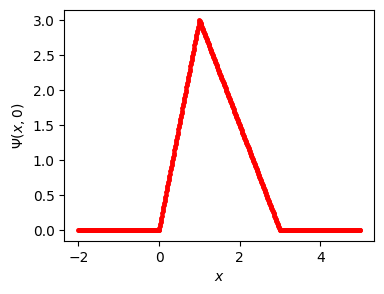

In [30]:
plt.figure(figsize=(4,3))

plt.plot(x, y, c='red', ls='', ms=5, marker='.')

plt.xlabel(r"$x$")
plt.ylabel(r"$\Psi(x,0)$")

plt.show()

## **4. Problem (wave function):**

Consider the wave function:

$\Psi(x,t) = A\,e^{-\lambda|\,x|}\,e^{-i\omega t}$

where $A=\sqrt{\lambda}$, $\lambda$, and $\omega$ are positive real constants.

Sketch $|\Psi|^2$ versus $x$ for different values.

In [31]:
# Python function
def psi_x(l,x):
  """
  Function to define a wavefunction with an exponential w/ absolute value argument.
  Author: WEBB
  Date: 24/10/2023
  Inputs: x -> vector, l -> lambda
  Ouput: psi_x -> wavefunction
  """

  A = np.sqrt(l)

  psi = (A**2)*np.exp(-l*np.abs(x))

  return psi

In [32]:
# The vector for the domain

x = np.arange(-10., 10., 0.01)

In [33]:
# Evaluate the function (case 1)
y1 = psi_x(2,x)

# Evaluate the function (case 2)

y2 = psi_x(1,x)

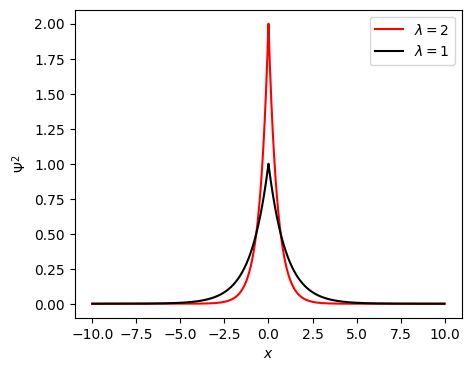

In [42]:
# Figure environment

plt.figure(figsize=(5,4))

plt.plot(x,y1, color = "red", label = r"$\lambda = 2$")
plt.plot(x,y2, color = "black", label = r"$\lambda = 1$")

plt.legend(loc = 1)

plt.xlabel(r"$x$")
plt.ylabel(r"$\Psi^2$")

plt.show()

## **5. Problem: 2D wavefunction**

$$f(x,y) = A \exp\left(-\left(\frac{(x - x_0)^2}{2\sigma_X^2} + \frac{(y - y_0)^2}{2\sigma_Y^2} \right)\right).$$

In [74]:
# Let's define a function:

sigma_x = 3.
sigma_y = 4.

def gaussian_2d(x, y):  # Which we can call later on
    """
    Function that returns a 2D gaussian
    Input: x, y -> 2D matrices containing the coordinates
    Ouput 2D Gaussian
    """
    return (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2)))) # Must be indented

# 1D vectors
x = np.linspace(-10, 10, 100)  # Define x coordinates
y = np.linspace(-10, 10, 100)  # Define y coordinates

# 2D Meshgrid
x_2d, y_2d = np.meshgrid(x, y)  #Create the grid, i.e., from vector coordinates, it generates a matrix of coordinates

# Call the function using the 2D meshgrid
z_2d = gaussian_2d(x_2d, y_2d) # Call function and get Z

Text(0.5, 0, 'z')

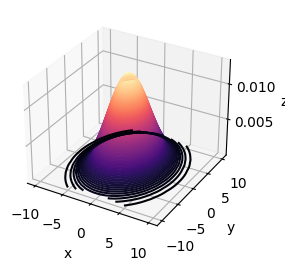

In [53]:
# Now we do some plotting:
fig = plt.figure(figsize=(4,3))

ax = plt.axes(projection='3d')
ax.contour3D(x_2d, y_2d, z_2d, 100, cmap='magma') # Creates 'n=100' contours at different z_2d to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

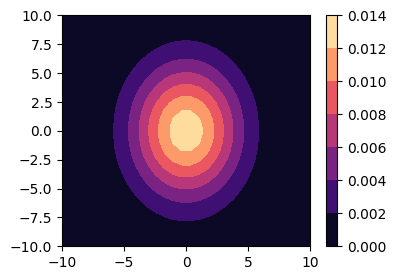

In [54]:
# Now we do some plotting:
fig = plt.figure(figsize=(4,3))

plt.contourf(x_2d, y_2d, z_2d, cmap='magma')
plt.colorbar()

plt.show()

## **6. Problem: Gaussian wavepacket**

In [61]:
def fwave(x):  # Which we can call later on
    return np.exp(-x**2/4)*np.sin(20.*np.pi*x) # Must be indented

In [62]:
# Generate the domain vector
x = np.linspace(-5., 5., 1000)

# Evaluate this using our fwave
y = fwave(x)

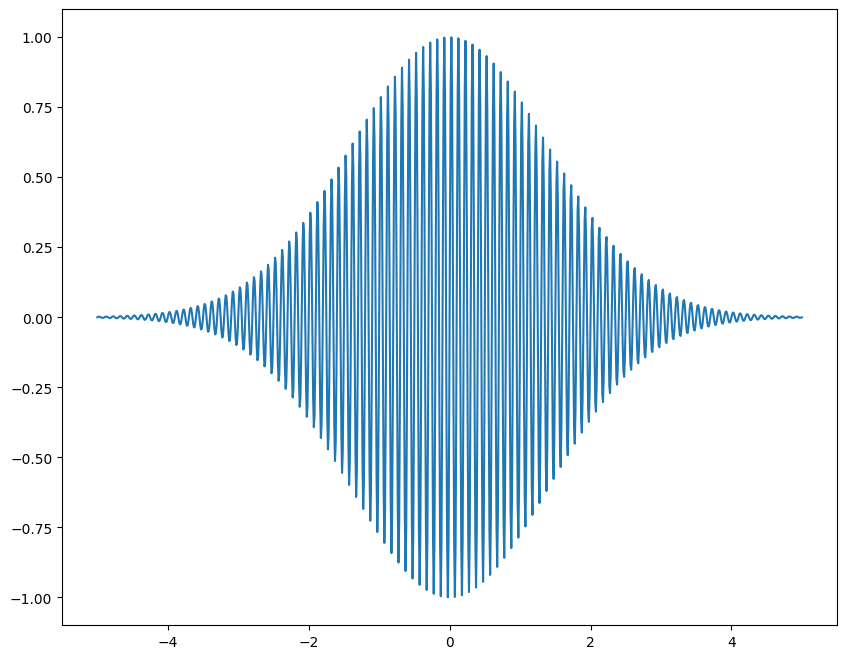

In [64]:
plt.figure(figsize=(10,8))

plt.plot(x, y)

plt.show()

# 7. 2D Gaussian wavepacket:

In [65]:
def gaussian_wp(x, y):  # Which we can call later on

    return (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2))))*\
    np.cos(2*np.pi*4*x)*np.cos(2*np.pi*4*y) # Must be indented

In [75]:
# Call the function using the 2D meshgrid
z_wp = gaussian_wp(x_2d, y_2d) # Call function and get Z

Text(0.5, 0, 'z')

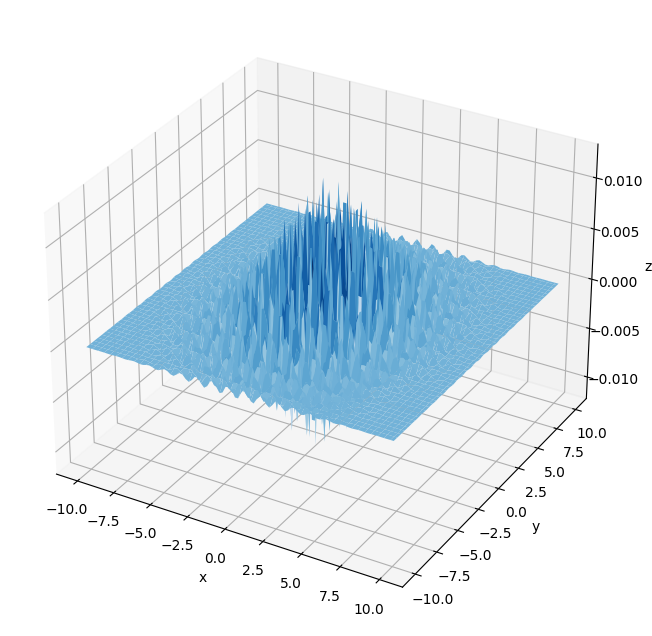

In [76]:
# Now we do some plotting:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection='3d')
ax.plot_surface(x_2d, y_2d, z_wp, cmap='Blues') # Creates 'n=100' contours at different z_2d to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

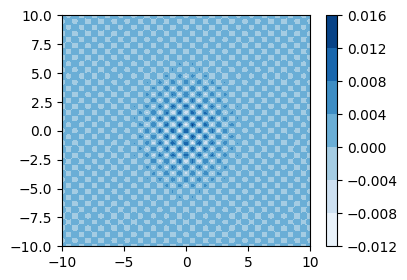

In [77]:
# Now we do some plotting:
fig = plt.figure(figsize=(4,3))

plt.contourf(x_2d, y_2d, z_wp, cmap='Blues')
plt.colorbar()

plt.show()